In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:

import pickle
import numpy as np
import csv
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [38]:
def load_features(pickle_file):
    with open(pickle_file, 'rb') as f:
        features = pickle.load(f)
    return features

In [39]:
train_features = load_features("/content/drive/My Drive/Train_Features.pkl")

In [47]:
images,labels = train_features

bus stand


In [48]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [54]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(labels)
X_train, X_test, y_train, y_test = train_test_split(images, y, test_size=0.2, stratify=y)

X_labeled, X_unlabeled, y_labeled, y_unlabeled = train_test_split(X_train, y_train, test_size=0.8)
X_labeled = X_labeled.reshape(X_labeled.shape[0], -1)
X_unlabeled = X_unlabeled.reshape(X_unlabeled.shape[0], -1)

[48500 44317 48396 45798 65057 22046  6253  6341 13708  2110   299   162
   166  1712  5636 18566 62101 33797 25076 63627 34617 47707 46161 28348
 15645  5734  1430   729   638  2562  5149 13503 26057 40388 13735 32643
 58724 36438 25286 28005 29126 27669 23822 16456  9036  5083  6066 12313
 17084 20503 29179]


In [8]:
X_labeled_np = np.array(X_labeled)
X_unlabeled_np = np.array(X_unlabeled)
y_labeled_np = np.array(y_labeled)
y_unlabeled_np = np.array(y_unlabeled)


In [69]:
from sklearn.tree import DecisionTreeClassifier
criterion=['entropy']
depth = 14
features = 8
# Initialize Decision Tree classifier
tree_model = DecisionTreeClassifier(criterion='entropy',max_depth=depth, max_features=features)

# Flatten image arrays
X_train_labeled_flatten = X_labeled.reshape(X_labeled.shape[0], -1)

# Train initial model on labeled data
tree_model.fit(X_train_labeled_flatten, y_labeled)


DecisionTreeClassifier(criterion='entropy', max_depth=14, max_features=8)

In [70]:
# Predicting labels for unlabeled data
pseudo_labels = tree_model.predict(X_unlabeled.reshape(X_unlabeled.shape[0], -1))

confidence_threshold = 0.9
confidence_scores = tree_model.predict_proba(X_unlabeled.reshape(X_unlabeled.shape[0], -1)).max(axis=1)
confident_predictions = confidence_scores > confidence_threshold

X_confident = X_unlabeled[confident_predictions]
pseudo_labels_confident = pseudo_labels[confident_predictions]
X_train_labeled = np.concatenate([X_labeled, X_confident])
y_train_labeled = np.concatenate([y_labeled, pseudo_labels_confident])

In [73]:

X_train_labeled_flatten = X_train_labeled.reshape(X_train_labeled.shape[0], -1)

# Retraining model with expanded labeled data
tree_model.fit(X_train_labeled_flatten, y_train_labeled)
y_pred = tree_model.predict(X_test.reshape(X_test.shape[0], -1))

accuracy = np.mean(y_pred == y_test)
print("Accuracy of the semi-supervised model:", accuracy)

Accuracy of the semi-supervised model: 0.35733333333333334


Precision: 0.37
Recall: 0.36
F1-score: 0.36


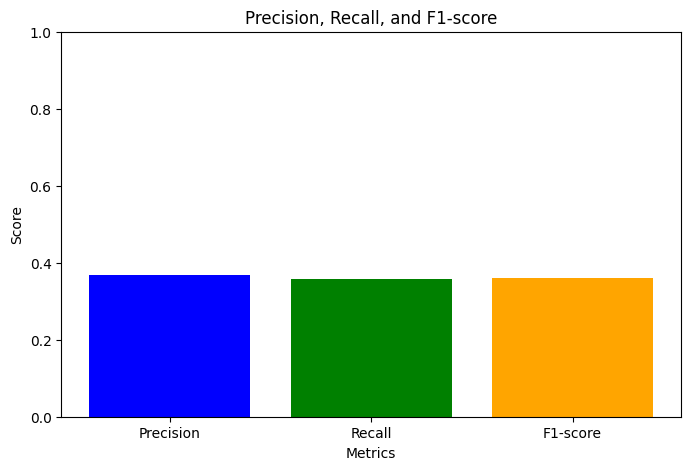

In [74]:
from sklearn.metrics import precision_recall_fscore_support

#precision, recall, and F1-score
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
print("Precision: {:.2f}".format(round(precision, 2)))
print("Recall: {:.2f}".format(round(recall, 2)))
print("F1-score: {:.2f}".format(round(f1_score, 2)))

metrics = ['Precision', 'Recall', 'F1-score']
values = [precision, recall, f1_score]

plt.figure(figsize=(8, 5))
plt.bar(metrics, values, color=['blue', 'green', 'orange'])
plt.title('Precision, Recall, and F1-score')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.show()


In [75]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

print(report)

              precision    recall  f1-score   support

    airfield       0.52      0.40      0.45       600
   bus stand       0.30      0.38      0.34       600
      canyon       0.33      0.34      0.33       600
      market       0.40      0.38      0.39       600
      temple       0.30      0.29      0.29       600

    accuracy                           0.36      3000
   macro avg       0.37      0.36      0.36      3000
weighted avg       0.37      0.36      0.36      3000



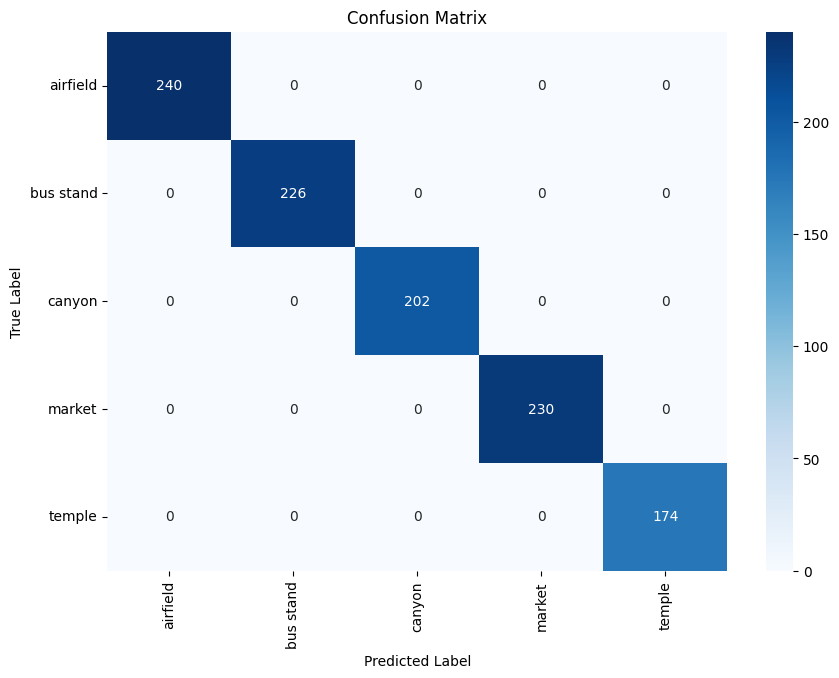

In [77]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


cm = confusion_matrix(y_test, y_pred)
diagonal_cm = np.zeros_like(cm)
np.fill_diagonal(diagonal_cm, np.diagonal(cm))
plt.figure(figsize=(10, 7))
sns.heatmap(diagonal_cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()
